<a href="https://colab.research.google.com/github/hongqin/Generative_AI_Fa25/blob/main/Q_learning_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


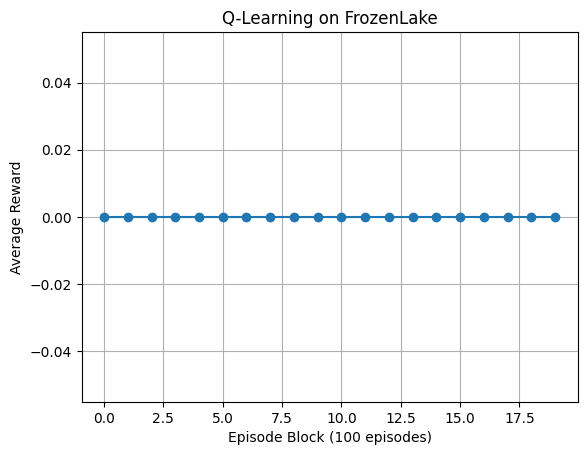

Learned Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [2]:
# chatGPT drafted, runs but seems to have no learning  20250707

# Q-Learning on FrozenLake with Gym 0.26.2 (Colab-ready)


# Install a compatible Gym version
!pip install gym==0.26.2 > /dev/null

import numpy as np

# Patch numpy for Gym compatibility (numpy.bool8 removal fix)
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

import gym
import random
import matplotlib.pyplot as plt

# Create FrozenLake environment (deterministic transitions)
env = gym.make('FrozenLake-v1', is_slippery=False)

# Initialize Q-table
state_size = env.observation_space.n
action_size = env.action_space.n
Q = np.zeros((state_size, action_size))

# Hyperparameters
alpha = 0.8       # Learning rate
gamma = 0.95      # Discount factor
epsilon = 0.1     # Exploration rate
episodes = 2000   # Number of training episodes
max_steps = 100   # Max steps per episode

# Store total rewards per episode
rewards = []

for ep in range(episodes):
    state = env.reset()      # Initial state
    total_reward = 0

    for _ in range(max_steps):
        # ε-greedy action selection
        if random.random() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state])        # Exploit

        new_state, reward, done, info = env.step(action)

        # Q-learning update: Q[s,a] += α*(r + γ*max_a'Q[s',a'] − Q[s,a])
        best_next = np.max(Q[new_state])
        Q[state, action] += alpha * (reward + gamma * best_next - Q[state, action])

        state = new_state
        total_reward += reward

        if done:
            break

    rewards.append(total_reward)

# Compute average reward per 100-episode block
blocks = np.split(np.array(rewards), episodes / 100)
avg_rewards = [blk.mean() for blk in blocks]

# Plot learning curve
plt.plot(avg_rewards, marker='o')
plt.xlabel('Episode Block (100 episodes)')
plt.ylabel('Average Reward')
plt.title('Q-Learning on FrozenLake')
plt.grid(True)
plt.show()

# Display learned Q-table
print("Learned Q-table:")
print(Q)
